# Colorizing Birds on TSNE

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.metrics import silhouette_samples, silhouette_score
from PIL import Image

from datetime import datetime

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.cm as cm

In [2]:
device_to_location = {
    4862: "Grassland 1",
    4879: "Grassland 2",
    23734: "Forest 1",
    23764: "Forest 2",
    23795: "Forest 3",
    23771: "Forest 4",
    23757: (datetime(month=7, day=14, year=2021, hour=14, second=55), ["Forest 3", "Forest 5"]),
    23700: "Forest 6",
}

In [3]:
#dpath='/grand/projects/BirdAudio/Soundscapes/TSNE_Data/Clusters_with_Birds/'
dpath='/grand/projects/BirdAudio/Soundscapes/TSNE_Data/Clusters/'

df = pd.read_csv (os.path.join(dpath, 'Data.csv'))

df

,Unnamed: 0,detection,confidence,year,month,day,hour,minute,second,week,weekday,device,set,x,y,labels,paths
0,0,Black-capped Chickadee,0.339766,2021,7,2,17,31,46,26,5,23757,set1,-40.134296,-5.549396,590,set1/00023757/20210702_STUDY/20210702T170007-0...
1,1,Black-capped Chickadee,0.959739,2021,7,2,17,31,46,26,5,23757,set1,-40.134296,-5.549396,590,set1/00023757/20210702_STUDY/20210702T170007-0...
2,2,No detection,1.000000,2021,7,21,23,8,27,29,3,23700,set2,6.699426,-110.575287,0,set2/00023700/20210721_STUDY/20210721T202300-0...
3,3,Eastern Wood-Pewee,0.348770,2021,6,19,13,14,15,24,6,23764,set1,-96.209358,30.586857,1,set1/00023764/20210619_STUDY/20210619T130000+0...
4,4,Indigo Bunting,0.993506,2021,7,16,9,36,57,28,5,4862,set2,6.273180,-6.140778,645,set2/00004862/20210716_STUDY/20210716T063151-0...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202365,202365,Baltimore Oriole,0.155123,2021,7,15,14,30,24,28,4,23700,set2,-1.896797,42.751675,231,set2/00023700/20210715_STUDY/20210715T131730-0...
202366,202366,No detection,1.000000,2021,8,25,23,2,6,34,3,4879,set3,78.315742,81.285347,523,set3/00004879/20210825_STUDY/20210825T170000-0...
202367,202367,No detection,1.000000,2021,5,28,20,40,21,21,5,23764,set1,-72.177475,71.208878,30,set1/00023764/20210528_STUDY/20210528T200000+0...
202368,202368,No detection,1.000000,2021,8,12,21,54,12,32,4,23734,set3,116.707939,-28.699533,111,set3/00023734/20210812_STUDY/20210812T202300-0...


In [4]:
# df=df[df['detection']!='No detection']
# df=df[df['confidence']>0.7]

In [5]:
unique_labels = np.unique(df['detection'])
np.where(unique_labels == 'Eastern Wood-Pewee')[0].item()

36

In [6]:
data=[]
for row in df.iterrows():
    bird_label = np.where(unique_labels == row[1]['detection'])[0].item()
    auxiliary={}
    auxiliary['detection']=row[1]['detection']
    auxiliary['confidence']=row[1]['confidence']
    auxiliary['year']=row[1]['year']
    auxiliary['month']=row[1]['month']
    auxiliary['day']=row[1]['day']
    auxiliary['hour']=row[1]['hour']
    auxiliary['minute']=row[1]['minute']
    auxiliary['second']=row[1]['second']
    auxiliary['week']=row[1]['week']
    auxiliary['weekday']=row[1]['weekday']
    auxiliary['device']=row[1]['device']
    auxiliary['set']=row[1]['set']
    auxiliary['x']=row[1]['x']
    auxiliary['y']=row[1]['y']
    auxiliary['labels']=row[1]['labels']
    auxiliary['paths']=row[1]['paths']
    auxiliary['detection']=row[1]['detection']
    auxiliary['bird_label']=bird_label

    location = device_to_location[auxiliary['device']]
    if isinstance(location, tuple):
        date = datetime(month=auxiliary['month'], day=auxiliary['day'], year=auxiliary['year'], hour=auxiliary['hour'], second=auxiliary['second'])
        if date < location[0]:
            auxiliary['location'] = location[1][0]
        else:
            auxiliary['location'] = location[1][1]
    else:
        auxiliary['location'] = location


    
    data.append(auxiliary)
    
data = pd.DataFrame(data=data)
data

,detection,confidence,year,month,day,hour,minute,second,week,weekday,device,set,x,y,labels,paths,bird_label,location
0,Black-capped Chickadee,0.339766,2021,7,2,17,31,46,26,5,23757,set1,-40.134296,-5.549396,590,set1/00023757/20210702_STUDY/20210702T170007-0...,10,Forest 3
1,Black-capped Chickadee,0.959739,2021,7,2,17,31,46,26,5,23757,set1,-40.134296,-5.549396,590,set1/00023757/20210702_STUDY/20210702T170007-0...,10,Forest 3
2,No detection,1.000000,2021,7,21,23,8,27,29,3,23700,set2,6.699426,-110.575287,0,set2/00023700/20210721_STUDY/20210721T202300-0...,61,Forest 6
3,Eastern Wood-Pewee,0.348770,2021,6,19,13,14,15,24,6,23764,set1,-96.209358,30.586857,1,set1/00023764/20210619_STUDY/20210619T130000+0...,36,Forest 2
4,Indigo Bunting,0.993506,2021,7,16,9,36,57,28,5,4862,set2,6.273180,-6.140778,645,set2/00004862/20210716_STUDY/20210716T063151-0...,51,Grassland 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202365,Baltimore Oriole,0.155123,2021,7,15,14,30,24,28,4,23700,set2,-1.896797,42.751675,231,set2/00023700/20210715_STUDY/20210715T131730-0...,4,Forest 6
202366,No detection,1.000000,2021,8,25,23,2,6,34,3,4879,set3,78.315742,81.285347,523,set3/00004879/20210825_STUDY/20210825T170000-0...,61,Grassland 2
202367,No detection,1.000000,2021,5,28,20,40,21,21,5,23764,set1,-72.177475,71.208878,30,set1/00023764/20210528_STUDY/20210528T200000+0...,61,Forest 2
202368,No detection,1.000000,2021,8,12,21,54,12,32,4,23734,set3,116.707939,-28.699533,111,set3/00023734/20210812_STUDY/20210812T202300-0...,61,Forest 1


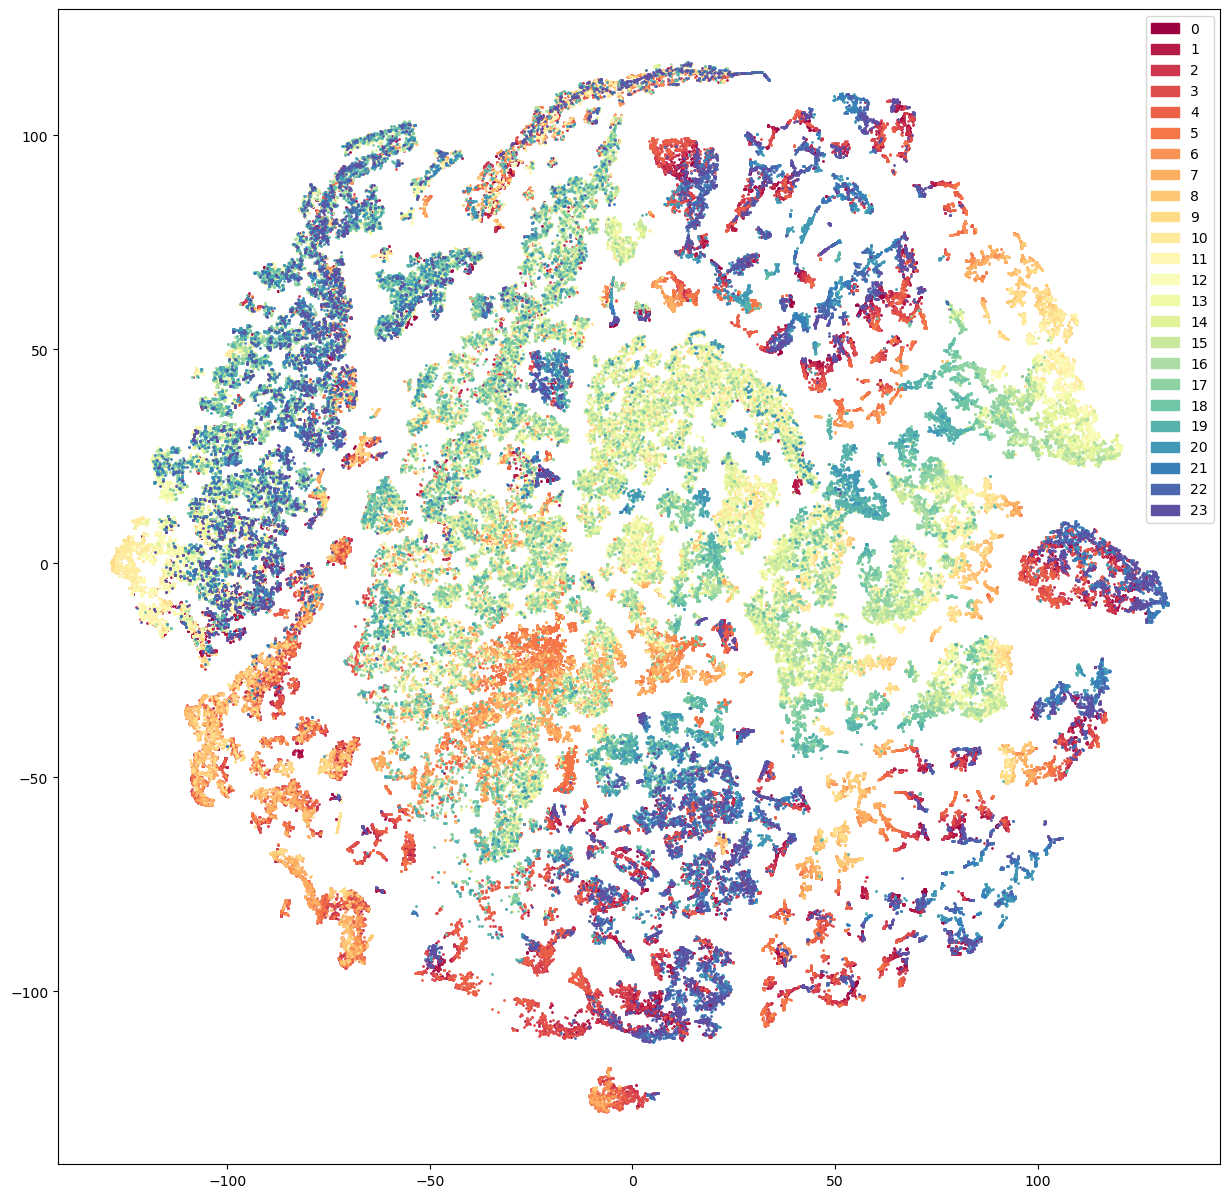

In [16]:
# Black removed and is used for noise instead.
column = 'hour'
labels = data[column]
f_embedded = np.transpose(np.array([data['x'], data['y']]))
unique_labels = set(data[column])
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[labels != -1] = True
n_noise_points = list(labels).count(-1)


fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
patches=[]
for k, col in zip(unique_labels, colors):
    #print('Color ', col)
    #print('Label ', k)

    class_member_mask = labels == k
    xy = f_embedded[class_member_mask & core_samples_mask]
    ax.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor=col,
        markersize=1,
    )

    patch = mpatches.Patch(color=col, label=k)
    patches.append(patch)

ax.legend(handles=patches)

fig.set_size_inches(15, 15)

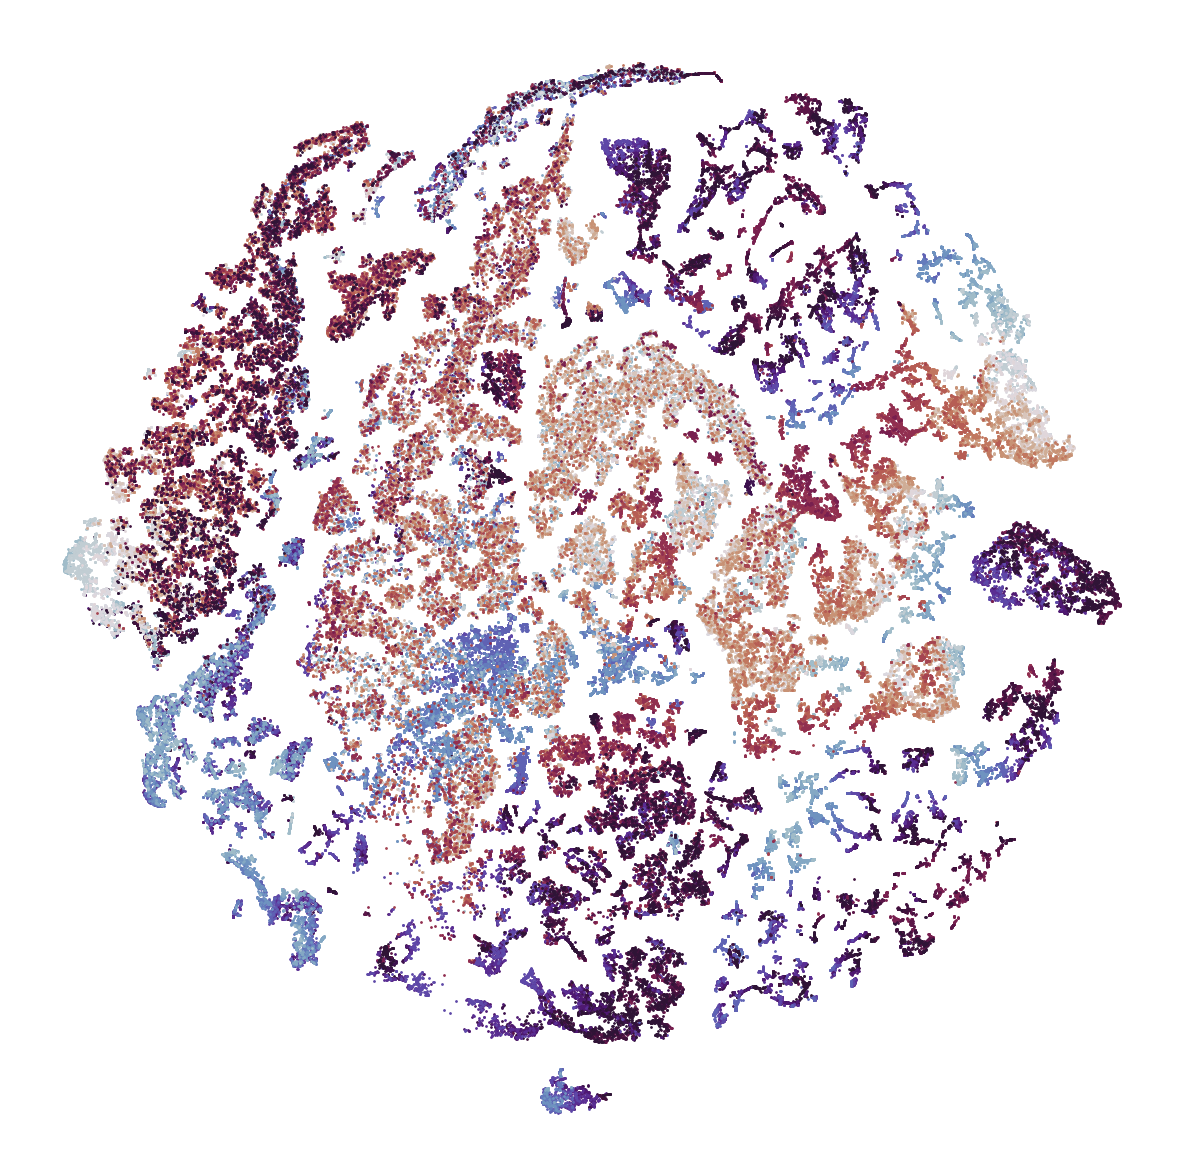

In [17]:
column = 'hour'
labels = data[column]
f_embedded = np.transpose(np.array([data['x'], data['y']]))
unique_labels = sorted(set(labels))

cmap = plt.cm.get_cmap("twilight_shifted" if column == 'hour' else 'Spectral')
colors = [cmap(each) for each in np.linspace(0, 1, len(unique_labels))]

core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[labels != -1] = True
n_noise_points = list(labels).count(-1)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

for k, col in zip(unique_labels, colors):
    detection_mask = (data['detection'] != "No detection") & (data['confidence'] > 0.9)
    class_member_mask = labels == k
    
    # This mask can be used to ignore particular devices.
    device_mask = ~data['device'].isin([4879, 23764])
    
    xy = f_embedded[class_member_mask & core_samples_mask]
    ax.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor=col,
        markersize=1,
    )        
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

    # Hide X and Y axes label marks
    ax.xaxis.set_tick_params(labelbottom=False)
    ax.yaxis.set_tick_params(labelleft=False)

    # Hide X and Y axes tick marks
    ax.set_xticks([])
    ax.set_yticks([])

if column == "hour":
    pass
    
elif column != 'labels':
    patches = [mpatches.Patch(color=col, label=k) for k, col in zip(unique_labels, colors)]
    #ax.legend(handles=patches, fontsize=28, loc="lower right")

fig.set_size_inches(15, 15)
plt.savefig(f"tsne_{column}.png", dpi=300)

In [ ]:
aux=data.loc[:, data.columns!='paths']
aux=aux.loc[:, aux.columns!='detection']
aux=aux.loc[:, aux.columns!='set']
metrics.silhouette_score(aux, aux[column])

In [ ]:
n_clusters = len(unique_labels)
silhouette_avg = silhouette_score(aux, aux[column])
print(
    "For n_clusters =",
    n_clusters,
    "The average silhouette_score is :",
    silhouette_avg,
)

# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(aux, aux[column])


In [ ]:
y_lower = 10
fig, ax1 = plt.subplots(1, 1)
fig.set_size_inches(9, 18)
for i in unique_labels:
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[aux[column] == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        facecolor=color,
        edgecolor=color,
        alpha=0.7,
    )

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")



In [ ]:
unique_labels

In [ ]:
aux